In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('Data_Train.xlsx')


In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


in that dataset we see that the our target variable are the price and they are in continues value.so we use the regression method.

In [4]:
df.shape

(10683, 11)

we see that in that dataset there are 10683 rows and 11 columns are presents.

In [5]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

there are few null values are presents.

In [6]:
df=df.dropna()

In [7]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df1=df.select_dtypes(object)

In [27]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [28]:
for i in df1:
    le=LabelEncoder()
    df1[i]=le.fit_transform(df1[i])

In [29]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,3,24,0,5,18,211,233,240,4,8
1,1,6,3,0,84,31,906,336,1,8
2,4,43,2,1,118,70,413,106,1,8
3,3,10,3,0,91,164,1324,311,0,8
4,3,0,0,5,29,149,1237,303,0,8
...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8
10679,1,29,3,0,64,193,1305,237,4,8
10680,4,29,0,2,18,58,824,280,4,8
10681,10,0,0,5,18,92,938,238,4,8


In [30]:
df2=df.select_dtypes(int)

In [31]:
df2

,Price
0,3897
1,7662
2,13882
3,6218
4,13302
...,...
10678,4107
10679,4145
10680,7229
10681,12648


In [32]:
df=pd.concat([df1 , df2], axis=1)

In [33]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8,4107
10679,1,29,3,0,64,193,1305,237,4,8,4145
10680,4,29,0,2,18,58,824,280,4,8,7229
10681,10,0,0,5,18,92,938,238,4,8,12648


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Date_of_Journey  10682 non-null  int32
 2   Source           10682 non-null  int32
 3   Destination      10682 non-null  int32
 4   Route            10682 non-null  int32
 5   Dep_Time         10682 non-null  int32
 6   Arrival_Time     10682 non-null  int32
 7   Duration         10682 non-null  int32
 8   Total_Stops      10682 non-null  int32
 9   Additional_Info  10682 non-null  int32
 10  Price            10682 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 842.2 KB


we convert all the data in numariac form because the computer only understand the numaric data.

In [10]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

# visualization of the data

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


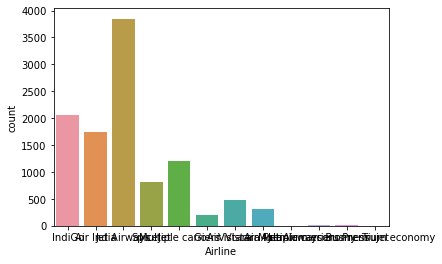

In [11]:
sns.countplot('Airline', data=df)
print(df['Airline'].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


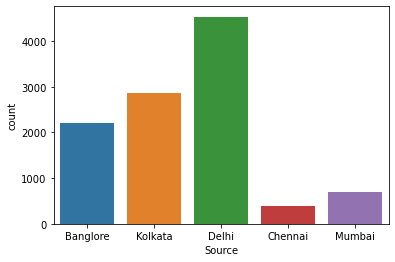

In [12]:
sns.countplot('Source', data=df)
print(df['Source'].value_counts())

source is high in delhi airport

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


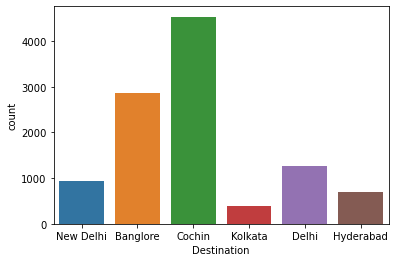

In [13]:
sns.countplot('Destination', data=df)
print(df['Destination'].value_counts())

cochin is mostly visited Destination

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64


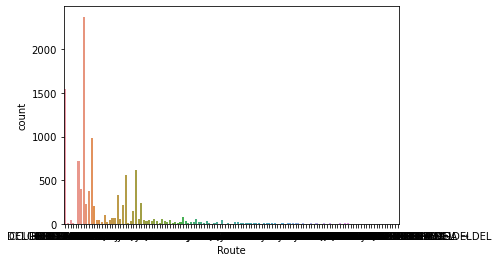

In [14]:
sns.countplot('Route', data=df)
print(df['Route'].value_counts())

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64


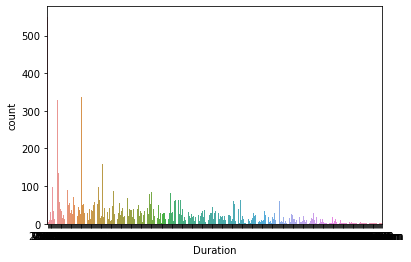

In [15]:
sns.countplot('Duration', data=df)
print(df['Duration'].value_counts())

2 hours 50min is the most common duration time.

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


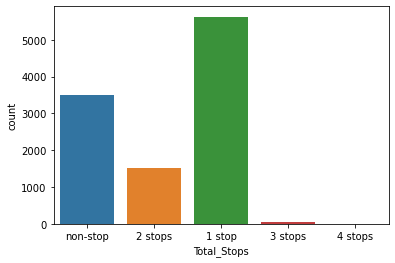

In [16]:
sns.countplot('Total_Stops', data=df)
print(df['Total_Stops'].value_counts())

we see that only one stop is vary high in the airline.

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


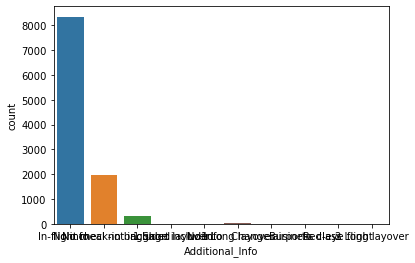

In [17]:
sns.countplot('Additional_Info', data=df)
print(df['Additional_Info'].value_counts())

no inforamtion is available.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


<AxesSubplot:xlabel='Airline', ylabel='Price'>

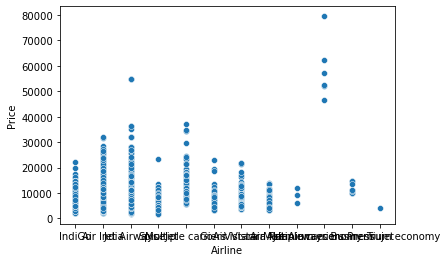

In [19]:
sns.scatterplot('Airline','Price',data=df)

<AxesSubplot:xlabel='Source', ylabel='Price'>

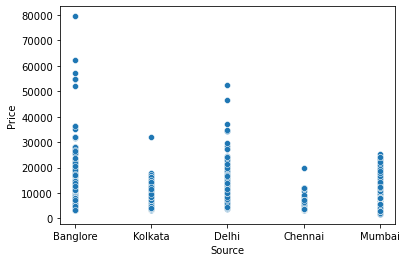

In [20]:
sns.scatterplot('Source','Price',data=df)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

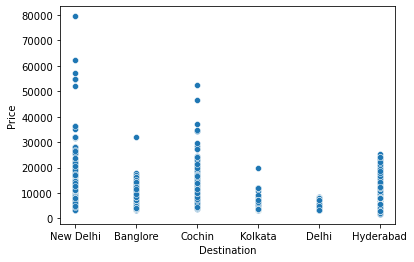

In [21]:
sns.scatterplot('Destination','Price',data=df)

<AxesSubplot:xlabel='Route', ylabel='Price'>

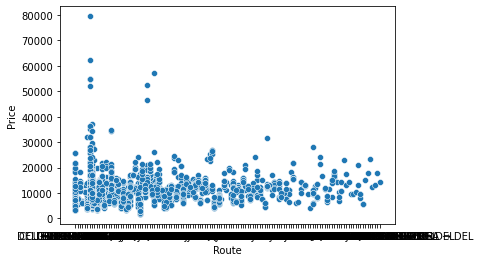

In [22]:
sns.scatterplot('Route','Price',data=df)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

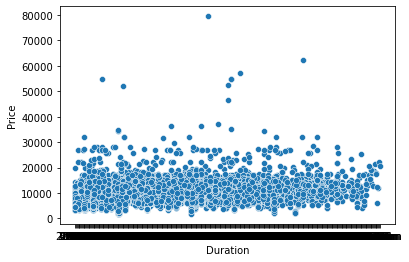

In [23]:
sns.scatterplot('Duration','Price',data=df)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

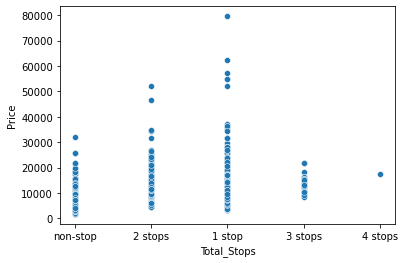

In [24]:
sns.scatterplot('Total_Stops','Price',data=df)

see that the stop size is increses the price is low.

# describetion

In [35]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,23.733758,1.952256,1.436154,74.820165,107.983898,869.846564,194.072177,1.458248,7.392998,9087.214567
std,2.352090,12.337569,1.177276,1.474845,36.729039,61.087537,331.519717,108.625225,1.806320,1.214254,4611.548810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000
25%,3.000000,14.000000,2.000000,0.000000,48.000000,55.000000,603.000000,106.000000,0.000000,8.000000,5277.000000
50%,4.000000,24.000000,2.000000,1.000000,73.000000,96.000000,937.000000,233.000000,0.000000,8.000000,8372.000000
75%,4.000000,35.000000,3.000000,2.000000,104.000000,164.000000,1141.000000,280.000000,4.000000,8.000000,12373.000000
max,11.000000,43.000000,4.000000,5.000000,127.000000,221.000000,1342.000000,367.000000,4.000000,9.000000,79512.000000


<AxesSubplot:>

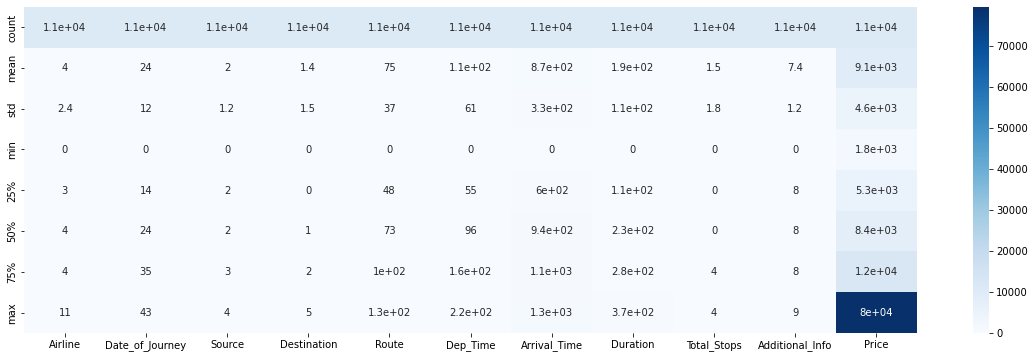

In [36]:
plt.figure(figsize=(20,6))
sns.heatmap(df.describe(), cmap='Blues', annot=True)

we see that in price column there are outliers presents.

# correlation

In [37]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
Airline,1.000000,0.022390,-0.013397,0.018446,0.025214,-0.039508,-0.015804,0.027886,0.035973,-0.060748,-0.039565
Date_of_Journey,0.022390,1.000000,0.167555,-0.273343,0.275121,-0.007776,-0.012445,-0.001137,-0.044069,0.008329,-0.036907
Source,-0.013397,0.167555,1.000000,-0.592576,0.403412,0.055194,0.020847,-0.192009,-0.225605,-0.022109,0.015999
Destination,0.018446,-0.273343,-0.592576,1.000000,-0.461176,-0.063625,-0.036847,0.022029,0.337872,0.026821,-0.071122
Route,0.025214,0.275121,0.403412,-0.461176,1.000000,-0.082013,0.010604,-0.062078,-0.437749,0.035152,0.164149
Dep_Time,-0.039508,-0.007776,0.055194,-0.063625,-0.082013,1.000000,-0.023325,0.041605,0.044647,-0.052828,0.002931
Arrival_Time,-0.015804,-0.012445,0.020847,-0.036847,0.010604,-0.023325,1.000000,0.027731,-0.097180,0.017532,0.027358
Duration,0.027886,-0.001137,-0.192009,0.022029,-0.062078,0.041605,0.027731,1.000000,0.175191,0.080166,-0.144280
Total_Stops,0.035973,-0.044069,-0.225605,0.337872,-0.437749,0.044647,-0.097180,0.175191,1.000000,0.164054,-0.571221
Additional_Info,-0.060748,0.008329,-0.022109,0.026821,0.035152,-0.052828,0.017532,0.080166,0.164054,1.000000,-0.065463


<AxesSubplot:>

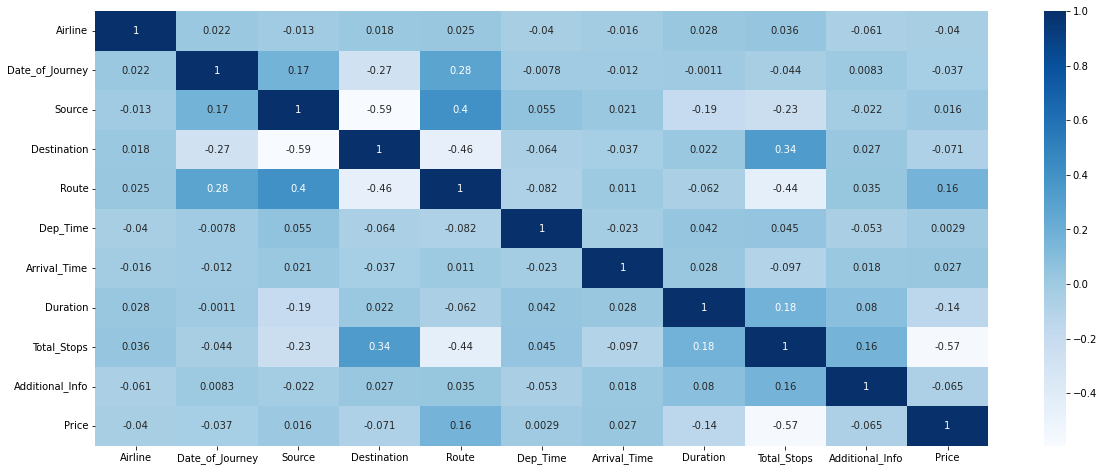

In [38]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [39]:
df.corr()['Price']

Airline           -0.039565
Date_of_Journey   -0.036907
Source             0.015999
Destination       -0.071122
Route              0.164149
Dep_Time           0.002931
Arrival_Time       0.027358
Duration          -0.144280
Total_Stops       -0.571221
Additional_Info   -0.065463
Price              1.000000
Name: Price, dtype: float64

we see that this is not very good correaltiom are present

In [40]:
df.corr()['Price'].sort_values()

Total_Stops       -0.571221
Duration          -0.144280
Destination       -0.071122
Additional_Info   -0.065463
Airline           -0.039565
Date_of_Journey   -0.036907
Dep_Time           0.002931
Source             0.015999
Arrival_Time       0.027358
Route              0.164149
Price              1.000000
Name: Price, dtype: float64

# skewness

In [41]:
df.skew()

Airline            0.731057
Date_of_Journey   -0.070718
Source            -0.424023
Destination        1.244046
Route             -0.501911
Dep_Time           0.194914
Arrival_Time      -0.606676
Duration          -0.213498
Total_Stops        0.631532
Additional_Info   -1.779689
Price              1.812405
dtype: float64

the skewness are very good . +-0.85 between all values are good skewness.

(array([6.028e+03, 4.390e+03, 1.820e+02, 6.600e+01, 7.000e+00, 1.000e+00,
        5.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1759. ,  9534.3, 17309.6, 25084.9, 32860.2, 40635.5, 48410.8,
        56186.1, 63961.4, 71736.7, 79512. ]),
 <BarContainer object of 10 artists>)

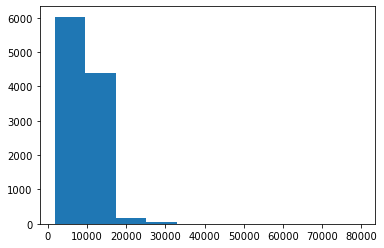

In [42]:
plt.hist('Price',data=df, bins=10)

we see that price are 5000 to 15000 are mostly.

(array([5.625e+03, 0.000e+00, 1.520e+03, 0.000e+00, 0.000e+00, 4.500e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 3.491e+03]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

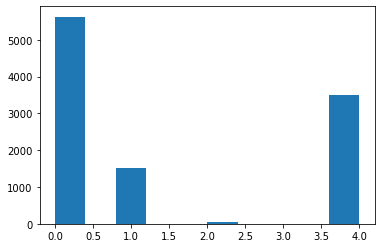

In [43]:
plt.hist('Total_Stops',data=df, bins=10)

0 and 4 stop are large numbers of time.

<AxesSubplot:xlabel='Price', ylabel='Density'>

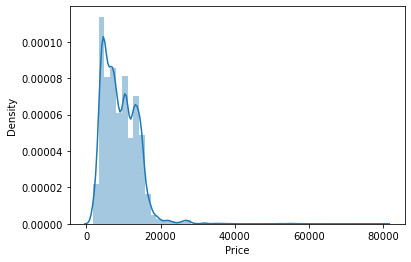

In [44]:
sns.distplot(df['Price'])

<AxesSubplot:>

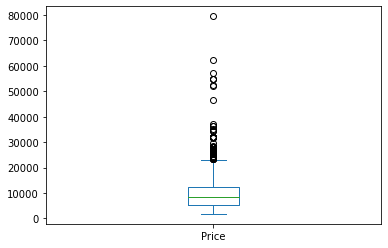

In [45]:
df['Price'].plot.box()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Airline          10682 non-null  int32
 1   Date_of_Journey  10682 non-null  int32
 2   Source           10682 non-null  int32
 3   Destination      10682 non-null  int32
 4   Route            10682 non-null  int32
 5   Dep_Time         10682 non-null  int32
 6   Arrival_Time     10682 non-null  int32
 7   Duration         10682 non-null  int32
 8   Total_Stops      10682 non-null  int32
 9   Additional_Info  10682 non-null  int32
 10  Price            10682 non-null  int64
dtypes: int32(10), int64(1)
memory usage: 842.2 KB


outliers are present in that column.

<AxesSubplot:>

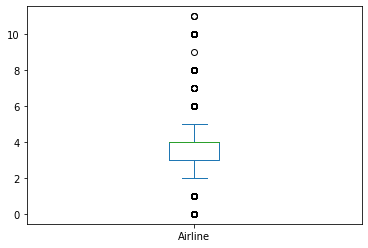

In [47]:
df['Airline'].plot.box()

outliers are present in that column.

<AxesSubplot:>

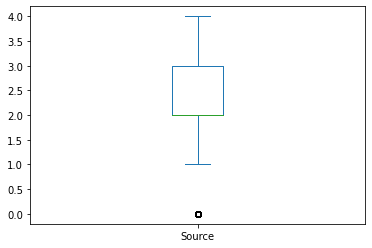

In [48]:
df['Source'].plot.box()

<AxesSubplot:>

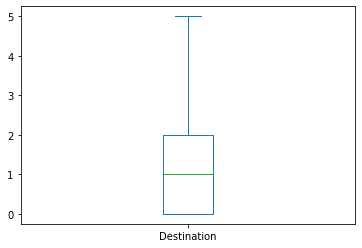

In [49]:
df['Destination'].plot.box()

<AxesSubplot:>

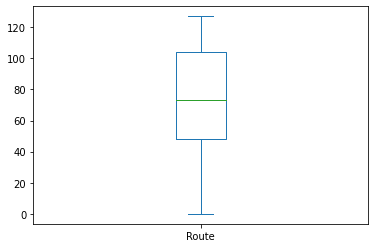

In [50]:
df['Route'].plot.box()

<AxesSubplot:>

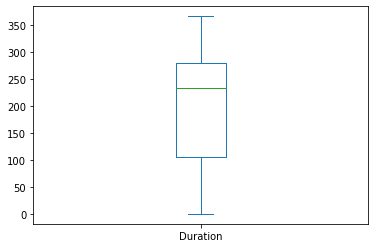

In [51]:
df['Duration'].plot.box()

<AxesSubplot:>

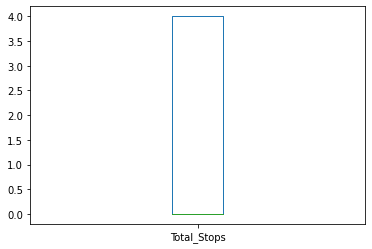

In [52]:
df['Total_Stops'].plot.box()

we visualize the all the data so we go to the model building process.

In [53]:
test=pd.read_excel('Test_set.xlsx')

In [54]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [55]:
df1=test.select_dtypes(object)

In [56]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [57]:
for i in df1:
    le=LabelEncoder()
    df1[i]=le.fit_transform(df1[i])

In [58]:
df1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,39,3,0,51,170,617,150,0,5
2667,3,28,3,0,43,106,507,213,4,5
2668,4,36,2,1,76,183,151,278,0,5
2669,1,36,2,1,76,11,577,60,0,5


In [59]:
df2=test.select_dtypes(float)

In [60]:
df2

""
0
1
2
3
4
...
2666
2667
2668
2669


In [61]:
x_test=pd.concat([df1,df2],axis=1)

In [62]:
x_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,4,39,2,1,76,138,150,10,0,5
1,3,10,3,0,65,31,353,248,0,5
2,4,22,2,1,76,156,566,148,0,3
3,6,22,2,1,76,48,633,36,0,5
4,0,27,0,2,16,198,135,216,4,5
...,...,...,...,...,...,...,...,...,...,...
2666,1,39,3,0,51,170,617,150,0,5
2667,3,28,3,0,43,106,507,213,4,5
2668,4,36,2,1,76,183,151,278,0,5
2669,1,36,2,1,76,11,577,60,0,5


# outliers removal

In [63]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  123,   396,   486,   510,   597,   628,   657,   785,   785,
          826,   936,   946,   959,   975,  1043,  1196,  1246,  1341,
         1424,  1466,  1478,  1629,  1654,  1785,  1918,  2055,  2079,
         2099,  2108,  2405,  2481,  2495,  2495,  2556,  2556,  2618,
         2635,  2693,  2924,  2924,  3032,  3032,  3111,  3111,  3257,
         3400,  3535,  3700,  3700,  3788,  4012,  4521,  4521,  4676,
         4829,  5013,  5013,  5136,  5372,  5372,  5439,  5628,  5662,
         5701,  5710,  5719,  5738,  5745,  5856,  5986,  6024,  6314,
         6336,  6407,  6576,  6576,  6588,  6605,  6991,  7351,  7356,
         7377,  7537,  7554,  7617,  7713,  7724,  7724,  7756,  7902,
         8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,
         8957,  8990,  9019,  9019,  9192,  9238,  9631,  9656,  9714,
         9973, 10051, 10112, 10159, 10181, 10188, 10352, 10363, 10363,
        10382, 10438, 10510, 10510], dtype=int64),
 array([10, 10, 10, 10, 10

In [64]:
df=df[(z<3).all(axis=1)]
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,3,24,0,5,18,211,233,240,4,8,3897
1,1,6,3,0,84,31,906,336,1,8,7662
2,4,43,2,1,118,70,413,106,1,8,13882
3,3,10,3,0,91,164,1324,311,0,8,6218
4,3,0,0,5,29,149,1237,303,0,8,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,41,3,0,64,183,1259,236,4,8,4107
10679,1,29,3,0,64,193,1305,237,4,8,4145
10680,4,29,0,2,18,58,824,280,4,8,7229
10681,10,0,0,5,18,92,938,238,4,8,12648


In [65]:
x=df.drop("Price", axis=1)
y=df["Price"]

In [66]:
from sklearn.preprocessing import power_transform
x_train=power_transform(x,method='yeo-johnson')

In [67]:
x_train

array([[-0.2949382 ,  0.05882919, -1.61518992, ...,  0.45947604,
         1.28725538,  0.52444541],
       [-1.41828256, -1.51922563,  0.89696943, ...,  1.24240327,
         0.34209003,  0.52444541],
       [ 0.14733965,  1.48832913, -0.02768761, ..., -0.74978597,
         0.34209003,  0.52444541],
       ...,
       [ 0.14733965,  0.45019765, -1.61518992, ...,  0.79179844,
         1.28725538,  0.52444541],
       [ 2.11609816, -2.20872491, -1.61518992, ...,  0.44259671,
         1.28725538,  0.52444541],
       [-1.41828256,  1.41646811, -0.02768761, ...,  1.32917468,
         0.34209003,  0.52444541]])

In [69]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10577, dtype: int64

In [70]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.41072166,  0.0075263 , -1.68093717, ...,  0.42316862,
         1.39794603,  0.50795368],
       [-1.25878471, -1.4666536 ,  0.88424426, ...,  1.30873664,
        -0.25962377,  0.50795368],
       [ 0.01330987,  1.56360509,  0.02918378, ..., -0.81293674,
        -0.25962377,  0.50795368],
       ...,
       [ 0.01330987,  0.41702072, -1.68093717, ...,  0.79215529,
         1.39794603,  0.50795368],
       [ 2.55749903, -1.9580469 , -1.68093717, ...,  0.40471929,
         1.39794603,  0.50795368],
       [-1.25878471,  1.48170621,  0.02918378, ...,  1.41020797,
        -0.25962377,  0.50795368]])

In [71]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [72]:
# only for the selection the random value
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train , y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"at random state {i}, the traing accuracy is- {r2_score(y_train,pred_train)}")
    print(f"at random state {i}, the testing accuracy is-{r2_score(y_test,pred_test)}")
    print('\n')

at random state 0, the traing accuracy is- 0.4085169671170602
at random state 0, the testing accuracy is-0.3874510111699747


at random state 1, the traing accuracy is- 0.4071339254675824
at random state 1, the testing accuracy is-0.392176236300972


at random state 2, the traing accuracy is- 0.4053512233889457
at random state 2, the testing accuracy is-0.40025467433513984


at random state 3, the traing accuracy is- 0.4028092349472292
at random state 3, the testing accuracy is-0.40958279546418863


at random state 4, the traing accuracy is- 0.40505429802238535
at random state 4, the testing accuracy is-0.40118421120367553


at random state 5, the traing accuracy is- 0.40937796474815147
at random state 5, the testing accuracy is-0.38279971175041994


at random state 6, the traing accuracy is- 0.4090597424098148
at random state 6, the testing accuracy is-0.38491814715265915


at random state 7, the traing accuracy is- 0.40891501197248914
at random state 7, the testing accuracy is-0.3827

at random state 99, the testing accuracy is-0.41731162169670777




In [73]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=15)

In [74]:
x_train.shape

(7403, 10)

In [75]:
y_train.shape

(7403,)

In [76]:
x_test.shape

(3174, 10)

In [77]:
lr=LinearRegression()
lr.fit(x_train , y_train)

LinearRegression()

In [78]:
lr.coef_

array([  -48.83358377,    36.40736745,  -339.76485342,    40.57453118,
         -41.00602939,   170.30441179,   -82.9476587 ,  -337.90690485,
       -2624.00788012,   302.48028186])

In [79]:
lr.intercept_

8883.253554470686

In [80]:
lr.score(x_train, y_train)

0.40193899532676036

In [82]:
pred=lr.predict(x_test)
print('/n predicted result prise',pred_test)
print('actual price',y_test)

/n predicted result prise [10468.35432152  9634.35029177 10025.99412247 ...  5382.24799286
  5373.38104525  9856.61144343]
actual price 9744     10262
4979      4077
9742      5673
928       8728
4030     14300
         ...  
1716     13067
9981      9627
5198     14441
8244     10577
10017     8018
Name: Price, Length: 3174, dtype: int64


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [86]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train, y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [87]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss=r2_score(y_test, pred_ls)
lss

0.40972973191145434

In [88]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4025739905683663

# ensemble technique

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'], 'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clt=GridSearchCV(rf,parameters)
clt.fit(x_train,y_train)

print(clt.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [90]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train, y_train)
rf.score(x_train, y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 score', rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score', rfc*100)

R2 score 90.44666387319472
Cross Val Score 90.22936029792152


# getting model saving

In [91]:
import pickle
filename='airplane_price.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [92]:
loaded_model=pickle.load(open('airplane_price.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9044666387319472


# conclusion

In [94]:
import numpy as np
a=np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com=pd.DataFrame({'original':a, 'predicted':predicted}, index=range(len(a)))
df_com

,original,predicted
0,10262,10358.140000
1,4077,4479.670000
2,5673,4953.240000
3,8728,8834.200000
4,14300,14600.337500
...,...,...
3169,13067,12721.190000
3170,9627,10714.150000
3171,14441,15510.256667
3172,10577,9748.920000


we see the original value and our model predicted values are see in that conclusion.